<a href="https://colab.research.google.com/github/caohong286/Packet-FunProject2-github-application/blob/master/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
faceCascade=cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
model = load_model('/content/mask_recognition.h5')

In [ ]:
def face_mask_detector(frame):
  gray = cv2.cvtColor(frame , cv2.COLOR_BGR2GRAY)
  faces = faceCascade.detectMultiScale(gray , scaleFactor =1.1, minNeighbors=5 , minSize=(60,60))
  faces_list =[]
  predictions=[]
  for (x,y,w,h) in faces:
    face_frame = frame[x:x+w,y:y+h]
    face_frame=cv2.cvtColor(face_frame , cv2.COLOR_BGR2RGB)
    face_frame=cv2.resize(face_frame , (224,224))
    face_frame=np.expand_dims(face_frame, axis=0)
    face_frame=preprocess_input(face_frame)
    faces_list.append(face_frame)
    if len(faces_list)>0:
      predictions = model.predict(faces_list)
    for pred in predictions:
      (mask , withoutMask)=pred
    label = "Mask" if mask>withoutMask else "No Mask"
    color = (0,255,0) if label=='Mask' else (0,0,255)
    label = "{}:{:.2f}%".format(label , max(mask , withoutMask)*100)
    cv2.putText(frame , label , (x,y+150),cv2.FONT_HERSHEY_DUPLEX,2,color,2)
    cv2.rectangle(frame , (x,y),(x+w, y+h),color,4)

  return frame

1/1 [==============================] - 0s 19ms/step


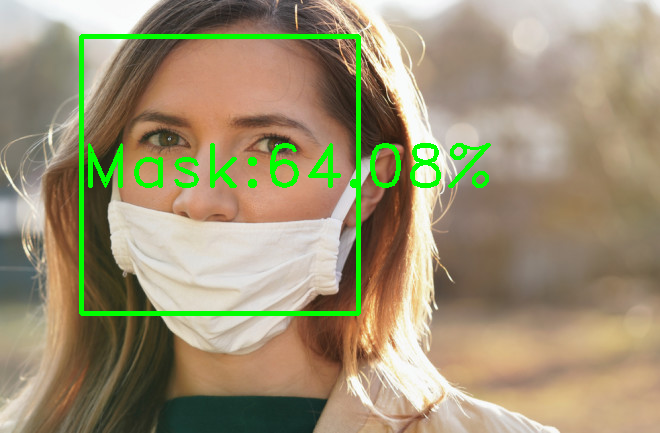

In [ ]:
input=cv2.imread('/content/person3.jpg')
output=face_mask_detector(input)
cv2_imshow(output)